In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# ! git clone https://github.com/smousavi05/EQTransformer '/content/drive/MyDrive/Colab Notebooks/Eq_Detection/EQTransformer'

Cloning into '/content/drive/MyDrive/Colab Notebooks/Eq_Detection/EQTransformer'...
remote: Enumerating objects: 2191, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 2191 (delta 32), reused 0 (delta 0), pack-reused 2131
Receiving objects: 100% (2191/2191), 51.31 MiB | 13.36 MiB/s, done.
Resolving deltas: 100% (1210/1210), done.


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Eq_Detection/

/content/drive/MyDrive/Colab Notebooks/Eq_Detection


In [ ]:
!pip install -e EQTransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/Colab%20Notebooks/Eq_Detection/EQTransformer
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 54.1 MB/s eta 0:00:00
  Running setup.py develop for EQTransformer


In [ ]:
# !gdown 1sgLd3eVIrTMcuWtOQRN1fGmiNQ7vc227

In [ ]:
# !gdown 1ONNNtiOwFodAAeV-ZWp_-gtWhRcYgU_E

Downloading...
From: https://drive.google.com/uc?id=1ONNNtiOwFodAAeV-ZWp_-gtWhRcYgU_E
To: /content/chunk2.zip
100% 13.7G/13.7G [01:41<00:00, 135MB/s]


In [ ]:
import pandas as pd
import numpy as np
import h5py, os
import matplotlib.pyplot as plt

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Eq_Detection'
data_dir = os.path.join(base_dir, 'data','indonesia')

In [ ]:
from EQTransformer.utils.downloader import downloadMseeds, makeStationList
import os
json_basepath = os.path.join(data_dir, 'station_list.json')
mseed_dir = os.path.join(data_dir, 'mseed')
h5_dir = os.path.join(data_dir, 'hdf5')


In [ ]:
makeStationList(json_path=json_basepath, client_list=["IRIS"], 
                min_lat=-11, max_lat=6, min_lon=95, max_lon=141, 
                start_time="2022-12-01 00:00:00.00", end_time="2023-01-01 00:00:00.00", 
                channel_list=["BHE", "BHN", "BHZ"], filter_network=[], filter_station=[])

AU--XMI
AU--XMIS
GE--BKB
GE--BKNI
GE--CISI
GE--FAKI
GE--GSI
GE--JAGI
GE--LHMI
GE--LUWI
GE--MMRI
GE--MNAI
GE--PMBI
GE--SAUI
GE--SMRI
GE--SOEI
GE--TNTI
GE--TOLI
GE--UGM
II--KAPI
MS--BDTF
MS--BESC
MS--BTDF
MS--KAPK
MS--NTU
MS--PTK
MS--UBIN
MY--BTM
MY--FRM
MY--IPM
MY--KGM
MY--KOM
MY--KSM
MY--KTM
MY--KUM
MY--LDM
MY--SBM
MY--SDM
MY--TSM
PS--JAY
PS--KSI
PS--PSI
SY--BKB
SY--BKNI
SY--BTDF
SY--CISI
SY--FAKI
SY--GSI
SY--IPM
SY--JAGI
SY--JAY
SY--KAPI
SY--KOM
SY--KSI
SY--KSM
SY--KUM
SY--LDM
SY--LHMI
SY--LUWI
SY--MMRI
SY--MNAI
SY--PMBI
SY--PSI
SY--SAUI
SY--SBM
SY--SMRI
SY--SOEI
SY--TNTI
SY--TOLI
SY--UBIN
SY--UGM
SY--XMI
SY--XMIS
SY--YOGI
XB--ELYHK
XB--ELYSE


In [ ]:
import json
with open(json_basepath, 'r') as f:
  station_json=json.load(f)

station_filt = {}
for key, value in station_json.items():
  if 'BHE' in station_json[key]['channels']:
    station_filt[key] = value

json_basepath_filt = os.path.join(data_dir, 'station_list_BH.json')
with open(json_basepath_filt, 'w') as f2:
  f2.write(json.dumps(station_filt))

In [ ]:
downloadMseeds(client_list=["IRIS"], 
               stations_json=json_basepath_filt, 
               output_dir=mseed_dir, 
               min_lat=-11, max_lat=6, min_lon=95, max_lon=141, 
               start_time="2023-01-01 00:00:00.00", end_time="2023-03-01 00:00:00.00", 
               chunk_size=1, channel_list=["BHE", "BHN", "BHZ"], n_processor=4)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from EQTransformer.utils.hdf5_maker import preprocessor

preprocessor(preproc_dir=h5_dir, 
             mseed_dir=data_dir, 
             stations_json=json_basepath, 
             overlap=0.3, n_processor=4)


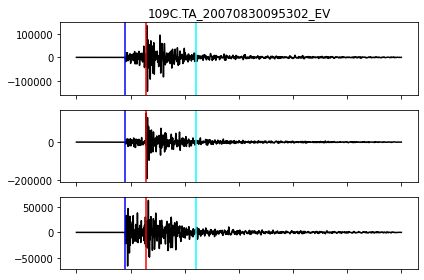

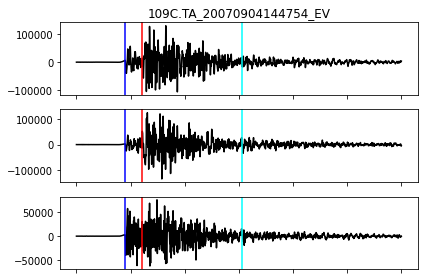

In [ ]:
csv_path = os.path.join(base_dir, 'chunk2_ev.1069.csv')
h5_path = os.path.join(base_dir, 'chunk2_ev.1069.hdf5')
metadata = pd.read_csv(csv_path)
ev_list = metadata['trace_name'].to_list()

h5 = h5py.File(h5_path, 'r')
for ev in ev_list[:2]:
  dset = h5.get(f'data/{ev}')
  times = np.array(dset.attrs['times'])
  
  fig, ax = plt.subplots(3,1)
  plt.tight_layout()

  for i in range(3):
    ymin, ymax = ax[i].get_ylim()
    xtr = ax[i].get_xaxis_transform()  
    ax[i].plot(np.array(dset)[:,i], 'k')
    ax[i].vlines(dset.attrs['p_arrival_sample'], ymin, ymax, color='b', transform=xtr, label='P-arrival')
    ax[i].vlines(dset.attrs['s_arrival_sample'], ymin, ymax, color='r', transform=xtr, label='S-arrival')
    ax[i].vlines(dset.attrs['coda_end_sample'], ymin, ymax, color='aqua', transform=xtr, label='Coda End')
    ax[i].set_xticklabels([])
    plt.tight_layout()
    if i==0:
      ax[i].set_title(ev)